In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy import stats

In [39]:
data = pd.read_excel('Hotel Reservations Data.xlsx')
data.head()

,Reservation ID,Guest ID,First Name,Last Name,Gender,Email,Phone,Nationality,Birthdate,Address,...,Payment Status,Special Requests,Reservation Source,Booking Date,Check-in Time,Check-out Time,Breakfast Included,Spa Package Included,Airport Pickup Included,Room Type Rate
0,1001,101,Laura,Weiss,Male,xconley@example.org,+1-777-290-9299x1874,Sweden,1990-06-20,194 Stewart Squares,...,Paid,They operation listen office no authority last...,Walk-in,2022-05-26,01:13:28,19:11:56,Yes,No,No,233
1,1002,102,Austin,Henderson,Female,williamaustin@example.org,4268908795,Cyprus,1999-07-22,31442 Morris Port Apt. 423,...,Pending,Agreement every land car.,Phone,2022-11-27,16:05:00,21:09:16,No,Yes,Yes,132
2,1003,103,Jamie,Smith,Male,benjaminporter@example.com,+1-563-234-8041x0677,Italy,1978-09-16,851 Ashley Junctions Apt. 370,...,Paid,Say exactly total field American.,Website,2022-07-22,18:54:33,23:34:07,No,Yes,No,88
3,1004,104,Brian,Erickson,Male,johnmelton@example.org,+1-377-838-9030x072,Slovakia,1958-02-21,7221 Lewis Burg,...,Pending,Operation better present effort teacher huge end.,Walk-in,2022-01-22,13:48:30,09:00:01,No,Yes,Yes,227
4,1005,105,Cristian,Taylor,Male,salazarkelly@example.com,5043212352,Norway,1984-11-30,9874 Melanie Ford Suite 715,...,Pending,Board little they really office.,Booking Platform,2022-06-15,15:32:38,23:48:24,Yes,No,Yes,229


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Reservation ID           9974 non-null   int64         
 1   Guest ID                 9974 non-null   int64         
 2   First Name               9974 non-null   object        
 3   Last Name                9974 non-null   object        
 4   Gender                   9974 non-null   object        
 5   Email                    9974 non-null   object        
 6   Phone                    9974 non-null   object        
 7   Nationality              9974 non-null   object        
 8   Birthdate                9974 non-null   datetime64[ns]
 9   Address                  9974 non-null   object        
 10  City                     9974 non-null   object        
 11  Postal Code              9974 non-null   int64         
 12  Country                  9974 non-

In [41]:
data.shape

(9974, 32)

In [82]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Reservation ID,9974.0,18870.937137,1001.0,3999.25,29174.5,32331.75,37036.0,14336.091517
Guest ID,9974.0,17970.937137,101.0,3099.25,28274.5,31431.75,36136.0,14336.091517
Birthdate,9974,1974-08-22 21:41:32.640866272,1943-02-05 00:00:00,1959-02-20 06:00:00,1974-06-19 12:00:00,1990-04-16 00:00:00,2006-01-25 00:00:00,NaN
Postal Code,9974.0,49824.038701,505.0,24745.0,49514.5,75010.5,99938.0,28876.035247
Check-in Date,9974,2023-02-01 00:12:33.639462400,2022-01-06 00:00:00,2022-08-02 06:00:00,2023-02-10 00:00:00,2023-08-03 00:00:00,2024-02-06 00:00:00,NaN
Check-out Date,9974,2023-02-03 20:03:39.450571264,2022-01-10 00:00:00,2022-08-06 00:00:00,2023-02-12 00:00:00,2023-08-06 00:00:00,2024-02-10 00:00:00,NaN
Room Number,9974.0,50.362944,1.0,26.0,50.0,75.0,100.0,28.692588
Floor Number,9974.0,2.497293,1.0,2.0,2.0,3.0,4.0,1.115753
Adults,9974.0,2.496992,1.0,1.0,2.0,4.0,4.0,1.122293
Children,9974.0,0.988169,0.0,0.0,1.0,2.0,2.0,0.814525


In [42]:
#kiểm tra dữ liệu thiếu trong tập dữ liệu
data.isnull().sum()

Reservation ID             0
Guest ID                   0
First Name                 0
Last Name                  0
Gender                     0
Email                      0
Phone                      0
Nationality                0
Birthdate                  0
Address                    0
City                       0
Postal Code                0
Country                    0
Check-in Date              0
Check-out Date             0
Room Number                0
Floor Number               0
Room Type                  0
Adults                     0
Children                   0
Total Nights               0
Total Amount               0
Payment Status             0
Special Requests           0
Reservation Source         0
Booking Date               0
Check-in Time              0
Check-out Time             0
Breakfast Included         0
Spa Package Included       0
Airport Pickup Included    0
Room Type Rate             0
dtype: int64

In [43]:
#kiểm tra số lượng dòng trong data
data.count()

Reservation ID             9974
Guest ID                   9974
First Name                 9974
Last Name                  9974
Gender                     9974
Email                      9974
Phone                      9974
Nationality                9974
Birthdate                  9974
Address                    9974
City                       9974
Postal Code                9974
Country                    9974
Check-in Date              9974
Check-out Date             9974
Room Number                9974
Floor Number               9974
Room Type                  9974
Adults                     9974
Children                   9974
Total Nights               9974
Total Amount               9974
Payment Status             9974
Special Requests           9974
Reservation Source         9974
Booking Date               9974
Check-in Time              9974
Check-out Time             9974
Breakfast Included         9974
Spa Package Included       9974
Airport Pickup Included    9974
Room Typ

In [84]:
#tính toán RFM
format = '%Y-%m-%d'
#lấy ngày lớn nhất trong reservation date
import datetime
current_date = max(data['Booking Date']) + datetime.timedelta(days=1)

# Tính toán RFM
RFM = data.groupby('Country').agg(
    {
        'Booking Date': lambda x: (current_date - x.max()).days,  
        'Reservation ID': 'count', 
        'Total Amount': 'sum'
    }
)
RFM.rename(columns={'Booking Date': 'Recency', 'Reservation ID': 'Frequency', 'Total Amount': 'MonetaryValue'}, inplace=True)
RFM.head(10)

,Recency,Frequency,MonetaryValue
Country,,,
Argentina,9,129,54902
Australia,2,88,40672
Austria,1,173,63538
Belgium,5,315,128269
Brazil,1,223,91063
Bulgaria,1,455,182564
Canada,5,158,62089
China,5,134,54652
Croatia,2,292,128315


In [45]:
RFM.shape

(40, 3)

C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3469703114.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM['Recency'], ax=ax[0])
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3469703114.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM['Frequency'], ax=ax[1])
C:\Users\ADMIN

<Axes: xlabel='MonetaryValue', ylabel='Density'>

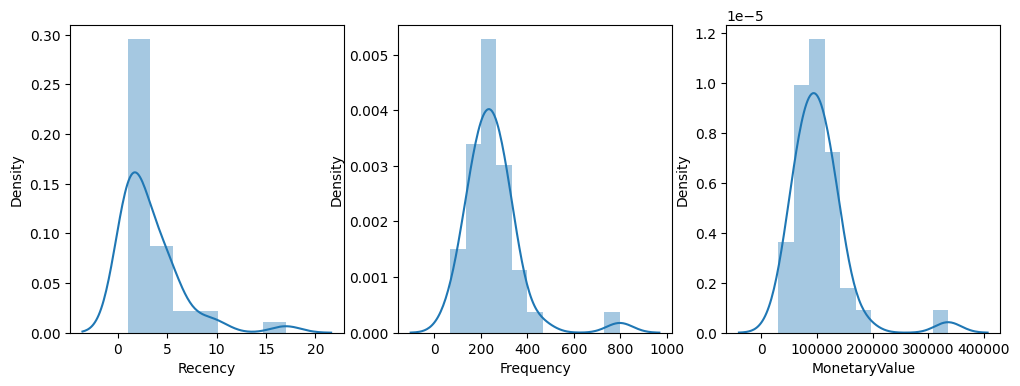

In [85]:
#vẽ phân phối để kiểm tra
fig, ax = plt.subplots(1,3, figsize = (12,4))
sns.distplot(RFM['Recency'], ax=ax[0])
sns.distplot(RFM['Frequency'], ax=ax[1])
sns.distplot(RFM['MonetaryValue'], ax=ax[2])

In [47]:
def analyze_skewness(x):
    fig, ax = plt.subplots(2,2,figsize=(5,5))
    sns.distplot(RFM[x], ax=ax[0,0])
    sns.distplot(np.log(RFM[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(RFM[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(RFM[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(RFM[x].skew().round(2))
    print(np.log(RFM[x]).skew().round(2))
    print(np.sqrt(RFM[x]).skew().round(2))
    print(pd.Series(stats.boxcox(RFM[x])[0]).skew().round(2))


C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3243309169.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[x], ax=ax[0,0])
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3243309169.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(RFM[x]), ax=ax[0,1])
C:\Users\ADMINS\AppD

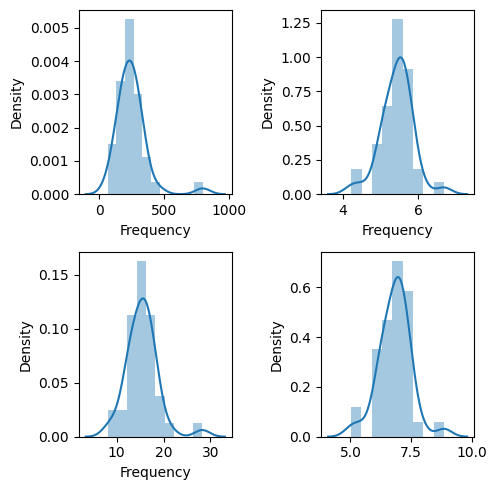

2.58
-0.18
1.14
0.02


In [48]:
#transform du lieu
analyze_skewness('Frequency')

C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3243309169.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[x], ax=ax[0,0])
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3243309169.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(RFM[x]), ax=ax[0,1])
C:\Users\ADMINS\AppD

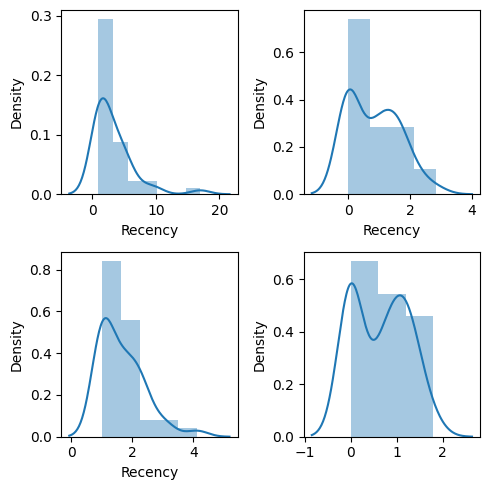

2.47
0.47
1.27
0.14


In [49]:
analyze_skewness('Recency')

C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3243309169.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[x], ax=ax[0,0])
C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\3243309169.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(RFM[x]), ax=ax[0,1])
C:\Users\ADMINS\AppD

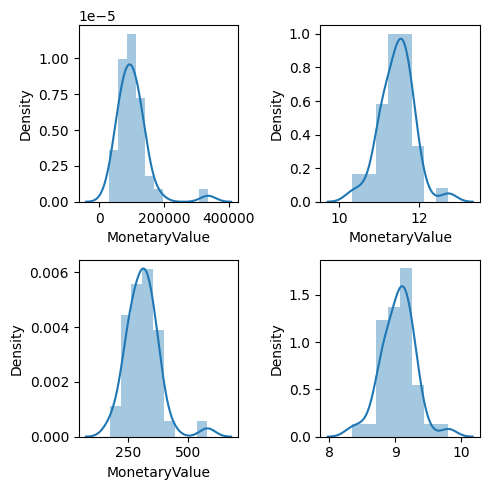

2.74
0.09
1.33
-0.01


In [86]:
analyze_skewness('MonetaryValue')

In [51]:
#transform du lieu
RFMt = pd.DataFrame()
RFMt['Recency'] = stats.boxcox(RFM['Recency'])[0]
RFMt['Frequency'] = stats.boxcox(RFM['Frequency'])[0]
RFMt['MoneytaryValue'] = stats.boxcox(RFM['MoneytaryValue'])[0]
RFMt.head()

,Recency,Frequency,MoneytaryValue
0,1.530962,5.954460,8.718772
1,0.615195,5.396312,8.529519
2,0.000000,6.394608,8.810051
3,1.229277,7.326524,9.241099
4,0.000000,6.783893,9.032513


In [52]:
scaler = StandardScaler()
scaler.fit(RFMt)
RFMt = scaler.transform(RFMt)
pd.DataFrame(RFMt).head()

,0,1,2
0,1.522591,-1.332014,-1.280421
1,-0.049365,-2.182302,-2.024205
2,-1.105377,-0.661490,-0.921682
3,1.004735,0.758199,0.772388
4,-1.105377,-0.068449,-0.047381


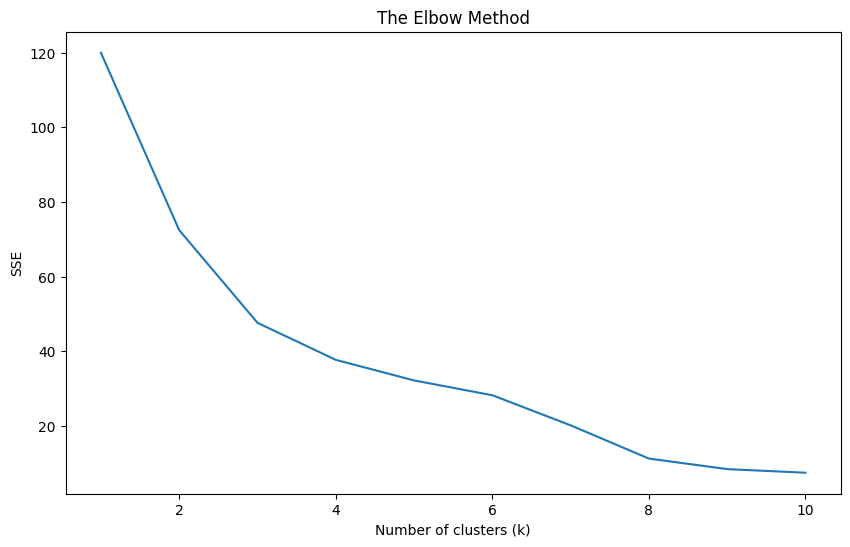

In [53]:
sse = {}
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(RFMt)
    sse[k] = km.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

In [ ]:
#K-Means
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans_labels = kmeans.fit_predict(RFMt)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(RFMt)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(RFMt)

In [ ]:
# Tính độ tin cậy dựa trên Silhouette Score
kmeans_silhouette = silhouette_score(RFMt, kmeans_labels)
dbscan_silhouette = silhouette_score(RFMt, dbscan_labels)
agg_silhouette = silhouette_score(RFMt, agg_labels)

print(f'Silhouette Score for K-means: {kmeans_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')
print(f'Silhouette Score for Agglomerative Clustering: {agg_silhouette}')

Silhouette Score for K-means: 0.3742805771100933
Silhouette Score for DBSCAN: 0.31108696839761496
Silhouette Score for Agglomerative Clustering: 0.4022408237937481


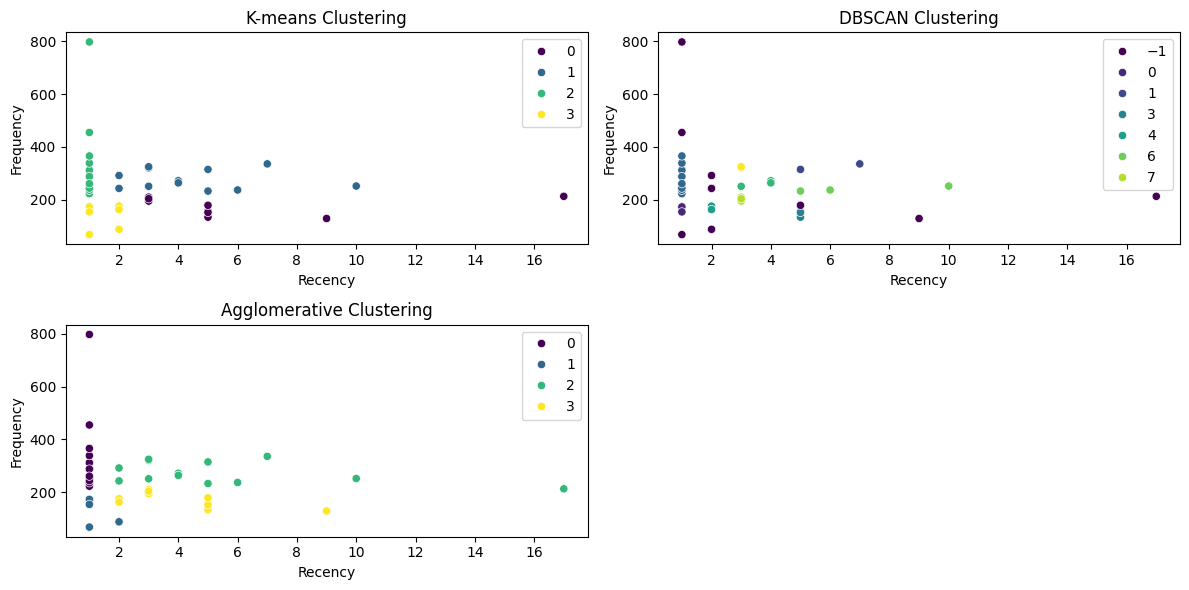

In [81]:
# Vẽ biểu đồ phân cụm
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
# K-means
sns.scatterplot(x=RFM['Recency'], y=RFM['Frequency'], hue=kmeans_labels, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('K-means Clustering')
# DBSCAN
sns.scatterplot(x=RFM['Recency'], y=RFM['Frequency'], hue=dbscan_labels, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('DBSCAN Clustering')
# Agglomerative Clustering
sns.scatterplot(x=RFM['Recency'], y=RFM['Frequency'], hue=agg_labels, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Agglomerative Clustering')
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

In [88]:
model = AgglomerativeClustering(n_clusters=4)
model.fit(RFMt)

AgglomerativeClustering(n_clusters=4)

In [90]:
RFM['Cluster'] = model.labels_
RFM.head()

,Recency,Frequency,MonetaryValue,Cluster
Country,,,,
Argentina,9,129,54902,3
Australia,2,88,40672,1
Austria,1,173,63538,1
Belgium,5,315,128269,2
Brazil,1,223,91063,0


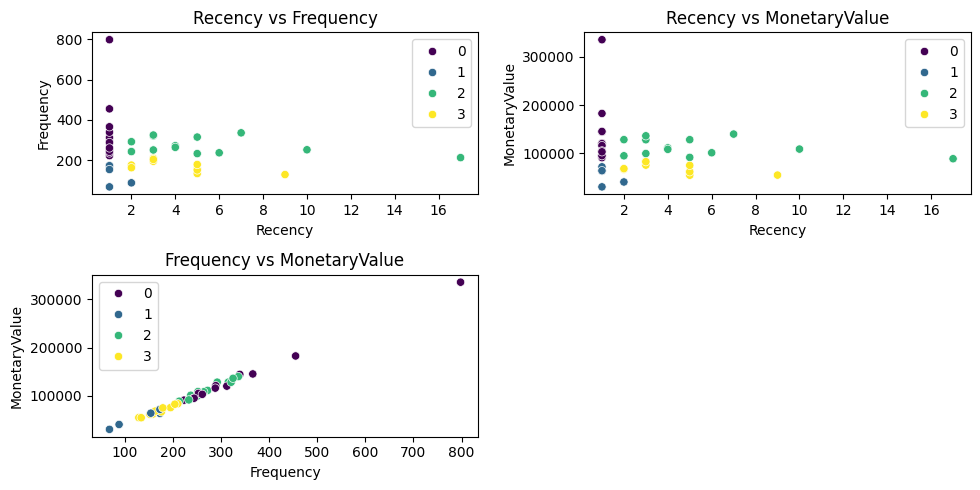

In [104]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
# Recency vs Frequency
sns.scatterplot(x=RFM['Recency'], y=RFM['Frequency'], hue=agg_labels, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Recency vs Frequency')

# Recency vs MonetaryValue
sns.scatterplot(x=RFM['Recency'], y=RFM['MonetaryValue'], hue=agg_labels, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Recency vs MonetaryValue')

# Frequency vs MonetaryValue
sns.scatterplot(x=RFM['Frequency'], y=RFM['MonetaryValue'], hue=agg_labels, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Frequency vs MonetaryValue')

axs[1, 1].axis('off')  # Ẩn trục không cần thiết

plt.tight_layout()
plt.show()


In [100]:
RFM.groupby('Cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': 'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,1.00,338.67,137934.17
1,1.20,131.20,54173.40
2,5.46,273.38,112715.77
3,4.20,170.00,68559.10


In [106]:
RFM['Cluster'] = agg_labels
def name_clusters(row):
    if row['Cluster'] == 0:
        return 'VIP Customers'
    elif row['Cluster'] == 1:
        return 'Loyal Customers'
    elif row['Cluster'] == 2:
        return 'High-Value Inactive Customers'
    elif row['Cluster'] == 3:
        return 'Regular Customers'
    else:
        return 'Other'

RFM['ClusterName'] = RFM.apply(name_clusters, axis=1)
RFM.head()

,Recency,Frequency,MonetaryValue,Cluster,ClusterName
Country,,,,,
Argentina,9,129,54902,3,Regular Customers
Australia,2,88,40672,1,Loyal Customers
Austria,1,173,63538,1,Loyal Customers
Belgium,5,315,128269,2,High-Value Inactive Customers
Brazil,1,223,91063,0,VIP Customers


In [105]:
clustered_countries = RFM.groupby('Cluster').apply(lambda x: x.index.tolist())
# Hiển thị các quốc gia của từng nhóm
for cluster, countries in clustered_countries.items():
    print(f"Cluster {cluster}:")
    print(countries)
    print()


Cluster 0:
['Brazil', 'Bulgaria', 'Cyprus', 'Finland', 'Germany', 'Italy', 'Lithuania', 'Portugal', 'Romania', 'Slovakia', 'Switzerland', 'United States']

Cluster 1:
['Australia', 'Austria', 'France', 'Netherlands', 'Russia']

Cluster 2:
['Belgium', 'Croatia', 'Czech Republic', 'Greece', 'Hungary', 'Latvia', 'Luxembourg', 'Norway', 'Poland', 'Serbia', 'Slovenia', 'Spain', 'Sweden']

Cluster 3:
['Argentina', 'Canada', 'China', 'Denmark', 'Estonia', 'India', 'Ireland', 'Japan', 'Malta', 'United Kingdom']



C:\Users\ADMINS\AppData\Local\Temp\ipykernel_17912\4191049615.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_countries = RFM.groupby('Cluster').apply(lambda x: x.index.tolist())


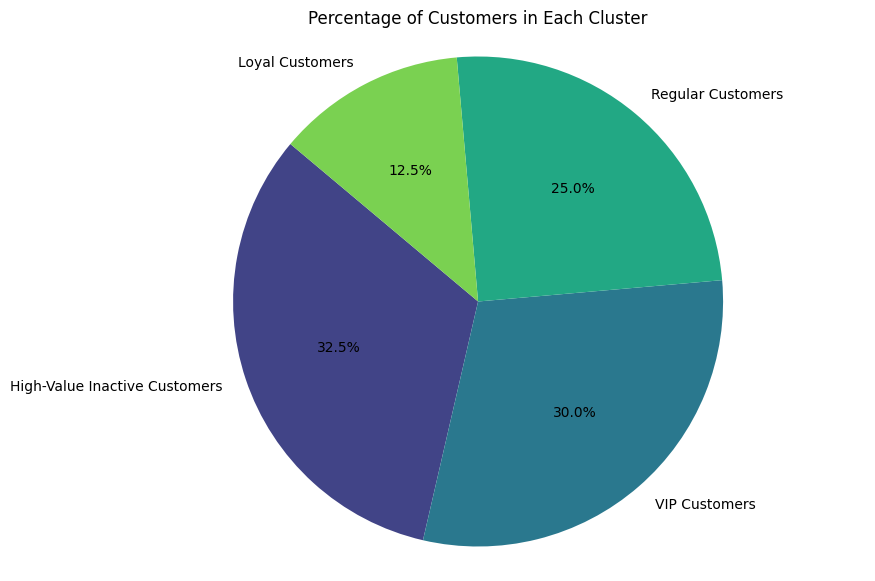

In [107]:
cluster_counts = RFM['ClusterName'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(cluster_counts)))
plt.title('Percentage of Customers in Each Cluster')
plt.axis('equal')
plt.show()
